In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [2]:
df_1000_genomes = pd.read_csv("matrix_1kg.txt",
                      sep = '\t')
df_1000_genomes

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pca_input = df_1000_genomes.iloc[:, 4:]
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pca_input = pca_input.T

In [5]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([ 2.81174983e-16,  8.04062032e-16, -6.15742413e-16, ...,
       -3.13720792e-16, -1.76030043e-15,  8.90923477e-16])

In [6]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[ -8.33942982, -10.42880756,  -2.49891279, ...,   0.42304841,
         -0.36745116,   0.65913685],
       [ -8.46123843, -10.32331261,  -5.29645777, ...,   1.03799779,
         -0.34745527,   0.12351668],
       [ -8.29420011,  -9.02381842,  -2.83420575, ...,   0.57587164,
         -0.19761548,   0.10871146],
       ...,
       [ -6.33274903,  -3.78070445,   7.00557626, ...,  -0.69353188,
          0.86950332,  -0.454783  ],
       [ -8.61492143,  -2.74355923,   8.74570947, ...,   0.14718982,
         -0.79523932,  -0.21132216],
       [ -6.07966909,  -1.78562855,   9.17551623, ...,   0.67046486,
         -0.10049548,   0.35279132]])

In [8]:
pca_output.shape

(2548, 10)

In [9]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
                            )
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.339430,-10.428808,-2.498913,-0.454816,5.156669,1.204084,0.936386,0.423048,-0.367451,0.659137
1,-8.461238,-10.323313,-5.296458,-0.309890,2.658524,0.121596,0.256735,1.037998,-0.347455,0.123517
2,-8.294200,-9.023818,-2.834206,-0.837985,4.215790,0.206603,0.174540,0.575872,-0.197615,0.108711
3,-7.921072,-9.075297,-5.269327,-0.276761,2.606668,0.096735,0.161810,-0.562807,0.379933,0.542553
4,-8.883854,-10.099711,-5.299222,0.284448,0.793962,0.069255,0.033260,0.143716,-0.636985,0.512092
...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478110,8.878774,0.630845,-3.010794,-0.565820,-1.498669,-0.432587,1.436885,-0.568920
2544,-8.438440,-3.946001,11.098509,0.396920,-1.382485,0.811346,1.249992,0.069321,0.975187,1.325156
2545,-6.332749,-3.780704,7.005576,0.980192,-0.887659,-0.891416,-0.055800,-0.693532,0.869503,-0.454783
2546,-8.614921,-2.743559,8.745709,-0.140782,-1.721728,-0.599267,-0.200555,0.147190,-0.795239,-0.211322


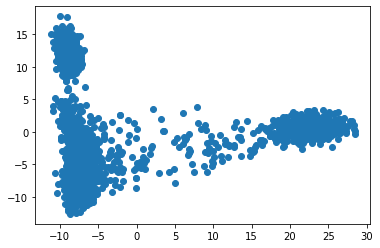

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])